<a href="https://colab.research.google.com/github/moreira-presh/HAMOYE-INTERNSHIP-2020/blob/master/Stage_D_Hamoye_personal_lesson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Hi, This is PRECIOUS OREKHA and I will be making a summarized/detailed explanation of some basics needed to understand TensorFlow.

This was done to help soothen the confusion in the Lesson 1 & 2 of the **Hamoye** note.

**Dataset :** MNIST

I'm still trying to fully grasp the whole concept of Tensor flow so I'd really apppreciate your contributions/criticism.

Do well to star this if it was helpful.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tf

from tensorflow import keras
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data() # data splitted into testing and training sets

In [2]:
print(train_labels[0]) # just checking out abbitrary numbers in the train data

5


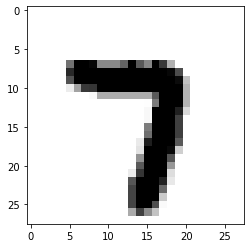

In [3]:
plt.imshow(train_images[2090],cmap=plt.cm.binary) # the result gives the labels(nummbers) btw 0 to 9
plt.show()

In [4]:
train_images[2090]

# doing this shows us our images are in arrays of 28*28 pixels
#  our data shows the pixel values and what they represent.
# we can see for a list values between 0 - 255 where those values rep ranges of colour scale
# for example 0 could rep total black and as it increases to 255 it becomes less black (white)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

1. We can Observe large numbers, so it is advisable to shrink our data so it falls within a certain range (small) for easy computation. 

2. What we do here is to modify our data so we have each value out of 1, i.e  we divide every single pixel value by 255 (being the highest).

3. So because this training images are stored in a numpy array,we can simply divide our train_images by 255 and do same for test_images



In [5]:
train_images = train_images/255

test_images = test_images/255

# We obviously don't do the the same for (labels) because they are already btw 0-9 

In [6]:
print (train_images.shape) # Before flattening is done
print (test_images.shape)
print (train_labels.shape)
print (test_labels.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


#Creating a Model

Before we create a model, it is important to first;
1. define the architecture of the model 

In [7]:
model = keras.Sequential([
      keras.layers.Flatten(input_shape=(28,28)), # this here is our first layer; "Input layer"
      keras.layers.Dense(128, activation='relu'), # this is the second layer, Dense - each neurone/node is connected to other neurons in the next network
      keras.layers.Dense(10,activation='softmax') ])# Output layer to produce expected 10 neurons
     

We Flattend our data so it can be passable to the neurons it would be easily fitted into.
Why?
1. our 28*28 pixels represents 28 rows and 28 columns which is obviously complex for the single neuron
2. Flattening helps us take those interior lists/arrays (28 rows/columns) and compresses it to a single list
3. This gives us a single list of 784 pixels rather than 28*28 pixels


**This is similar to the product function used in the Hamoye lesson notebook;**

 ***new_dimension = np.prod(train_images.shape[1:] )***

where the "prod" multiplies the 28*28 pixels to give 784

2. The Dense layer here is merely a fully connected layer where each neuron connects to several other neurons and like that.

3. The number *128*, well from a video I watched, the tutor said this number is more like a 15-20% of the input layer of neurons, which in this case is 784.
  Normally some fractions of the neurons in the  input layer are used in the hidden layer for training. 15% of 784 = 117.6 but we use 2exp7 = 128. Also mathematically using 2exp8 gives 256 which is more, maybe for the input layer.

4. From our lesson note, the activation function helps to improve the complexities; i.e gives the ability for the netwrk to learn complex relationship between the input and output variables.

The "relu" which is one example is fast and works well for a variety of applications.

The "softmax" pick values for each neuron so that all those values add up to one, i.e. the probablity of the network thikning it is a certain value.




#Set Parameter for our model

In [8]:
model.compile(optimizer='adam', loss = "sparse_categorical_crossentropy", metrics=['accuracy'])

# the loss function simply helps us understand the error, i.e how far the predicted value is from the actual value.


#Training our model

In [9]:
model.fit(train_images,train_labels, epochs=20) # how many times the model see the info (train images/labels)

# so what epochs does is that it randomly picks images and labels corresponding to each other and feeds that into the neural network.
# So how many epochs you decide tell us how many times you want to see the same image 
# so the amount of epochs it runs the amount it sees the same image and obviosly makes a better decision about the image it has seen

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2607 - accuracy: 0.9262
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1151 - accuracy: 0.9654
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0787 - accuracy: 0.9761
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0598 - accuracy: 0.9817
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0464 - accuracy: 0.9863
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0371 - accuracy: 0.9883
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0299 - accuracy: 0.9907
Epoch 8/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0238 - accuracy: 0.9928
Epoch 9/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0190 - accuracy: 0.9941
Epoch 10/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.016

we can see here that while training, the degree of accuracy increased as the no of epoch increased. This is not always the same as somtimes it could lead to overfitting and may start decreasing at some point. So it is good we play with it by tweaking to see which gives better accuracy/lower loss


Also we observe the loss function reduces at each instance, this is actually a good thing.

## Testing the accuracy of the model

In [10]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.1080 - accuracy: 0.9773


In [11]:
print ("Tested Accuracy", test_acc)

Tested Accuracy 0.9772999882698059


we can see an accuracy of 97 percent which means our model is actually very good

# **Now we predict our model**

In [12]:
prediction = model.predict(test_images)
print(prediction[209])

# 209 is just any random number, it could be 0 or anything.
# we can see here that we have some sort of array (probability) with different numbers, which is actually difficult to interpret.
# We will use the "argmax" fuction to index out the highest number from the array as our right prediction.
print("\n")
print(np.argmax(prediction[209]))

[1.04265639e-24 2.27652636e-18 3.46191920e-14 2.50375956e-06
 1.16304896e-10 9.10934604e-14 5.39008757e-35 1.54520396e-10
 1.57147610e-13 9.99997497e-01]


9


We can see here that our model has actually predicted no 9 which rep the label/class in the dataset.

## **Comparing the Actual and Predicted values to check its accuracy**

Using a For Loop to go through the images in our test images and show them on the screen with their actual values to see if they match.

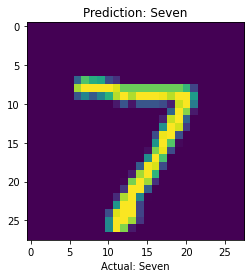

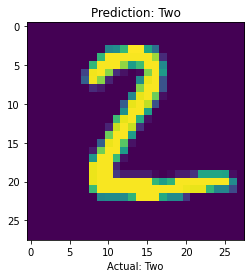

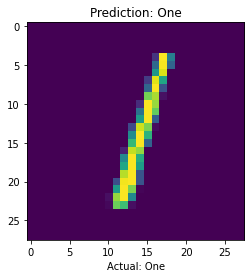

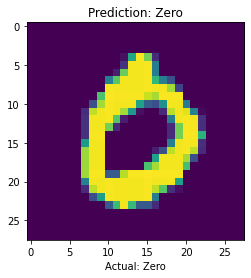

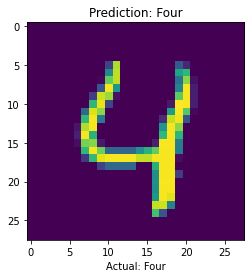

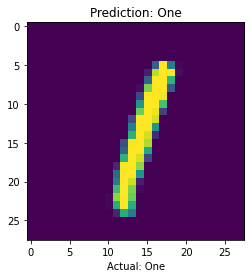

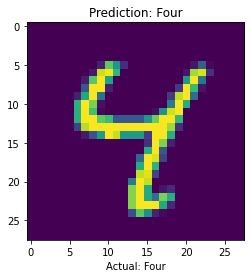

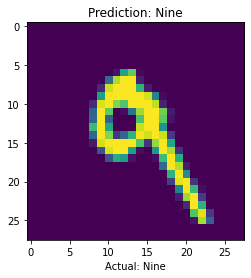

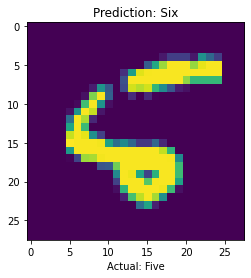

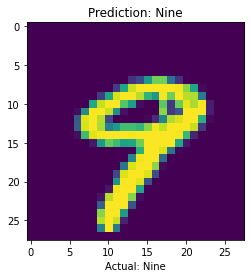

In [13]:
class_name = ['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine'] 

# doing this to avoid getting a type error in the test_labels which is in numeric form


for i in range(10):
  plt.grid(False)
  plt.imshow(test_images[i],cmap = None)
  plt.xlabel ("Actual: " + class_name[test_labels[i]]) 
  plt.title("Prediction: " + class_name[np.argmax(prediction[i])])
  plt.show()

We can see here that the Actual Values matched the Predicted values.

This shows the model is ready for deployment.

# Cheers!

I hope this helped in any way possible.

This was done to help us understand the codes applied in the **Hamoye** lesson note 1 & 2

Please I'd appreciate collaboration to help make this better.

**Student ID: Precious Orekha - 406ca4**